<a href="https://colab.research.google.com/github/diosamuel/road-crack-detection/blob/main/GLCM_FEATURE_EXTRACTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Downloader via Roboflow

download image that has been bounded box help by roboflow

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [2]:
!rm -r /content/RoadCrack-2

rm: cannot remove '/content/RoadCrack-2': No such file or directory


In [3]:
import os
import json
from roboflow import Roboflow
rf = Roboflow(api_key="4V6T95yomp7w4ccYHkYr")
project = rf.workspace("foreveyrone").project("roadcrack-4xqqm")
version = project.version(3)
dataset = version.download("voc")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadCrack-3 in voc:: 100%|██████████| 679/679 [00:01<00:00, 387.24it/s]


In [4]:
!pip install opencv-python

In [5]:
!pip install pillow

# Cut Image based on bounding box

In [6]:
!mkdir /content/cropped/
!mkdir /content/cropped/retak
!mkdir /content/cropped/tidak-retak

In [7]:
import xml.etree.ElementTree as ET
from PIL import Image
# tree = ET.parse('data.xml')
# root = tree.getroot()

dir = os.listdir("/content/RoadCrack-3/train")
for i in dir:
  if ".xml" in i:
    with open(f"/content/RoadCrack-3/train/{i}") as f:
      content = f.read().strip()
      value = ET.fromstring(content)
      if not value.find(".//bndbox/xmin") is None:
        paths = f"/content/RoadCrack-3/train/{value.find('path').text}"
        xmin = int(value.find(".//bndbox/xmin").text)
        xmax = int(value.find(".//bndbox/xmax").text)
        ymin = int(value.find(".//bndbox/ymin").text)
        ymax = int(value.find(".//bndbox/ymax").text)
        img = Image.open(paths)
        cropped_img = img.crop((xmin, ymin, xmax, ymax)).resize((64*4, 64*4))
        classifier = value.find(".//name").text
        cropped_img.save(f"/content/cropped/{classifier}/cropped_{value.find('path').text}")
        # if cropped_img:
          # cv2.imwrite(f"/content/cropped/cropped_{paths}", cropped_img)


In [8]:
!ls /content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg

ls: cannot access '/content/cropped/cropped_IMG_20251113_143926_jpg.rf.6b037bbfd44fbba61dd2abc72d898d36.jpg': No such file or directory


# GLCM Features

Contrast, Dissimilarity, Homogeneity, Energy and Correlation

In [9]:
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage import data, io, feature, util, transform
from matplotlib import pyplot as plt

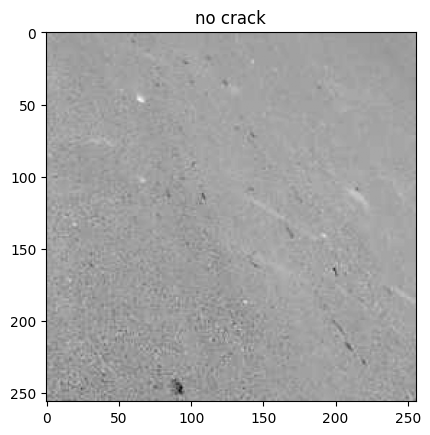

In [10]:
example = "/content/cropped/tidak-retak/cropped_IMG_20251123_160924_3_jpg.rf.bb5b566121c9b45df04b85f27e7ba141.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'no crack')
plt.show()

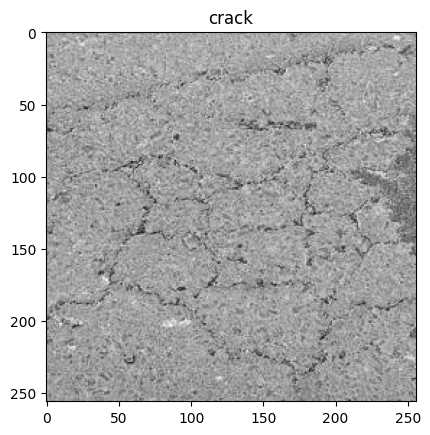

In [11]:
example = "/content/cropped/retak/cropped_IMG_20251106_150643_jpg.rf.c06a0746cde2bb34bbfe60f76420f6b7.jpg"
im_frame = Image.open(example).resize((64*4, 64*4))
image = (255*rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)

plt.imshow(imaged, cmap='gray')
plt.title(f'crack')
plt.show()

# Init GLCM Function

In [12]:
def glcm_process(img, path="/content/cropped/"):
    im_frame = Image.open(f"{path}{img}")
    if im_frame.mode == "RGBA":
        im_frame = im_frame.convert("RGB")
    im_frame = im_frame.resize((64*2, 64*2))
    image = (256 * rgb2gray(np.array(im_frame))).astype(np.uint8)
    image = util.img_as_ubyte(image)
    # GLCM
    distances = [50]
    angles = [np.pi/2]
    glcm = graycomatrix(
        image,
        distances=distances,
        angles=angles,
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation


# Crafting Dataframe

In [13]:
import pandas as pd

df_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])
df_no_crack = pd.DataFrame(columns=["contrast","dissimiliarity","homogeneity","energy","correlation"])

In [14]:
df_crack,df_no_crack

(Empty DataFrame
 Columns: [contrast, dissimiliarity, homogeneity, energy, correlation]
 Index: [],
 Empty DataFrame
 Columns: [contrast, dissimiliarity, homogeneity, energy, correlation]
 Index: [])

In [15]:
cropped_dir = os.listdir("/content/cropped/retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_crack = pd.concat([df_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [16]:
cropped_dir = os.listdir("/content/cropped/tidak-retak")
for img in cropped_dir:
  contrast,dissimiliarity,homogeneity,energy,correlation=glcm_process(img,path="/content/cropped/tidak-retak/")
  row = pd.DataFrame({
      'contrast': contrast[0][0],
      'dissimiliarity': dissimiliarity[0][0],
      'homogeneity': homogeneity[0][0],
      'energy': energy[0][0],
      'correlation': correlation[0][0]
  }, index=[0])
  df_no_crack = pd.concat([df_no_crack, row], ignore_index=True)

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [17]:
df_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,747.272937,21.079627,0.050519,0.018368,-0.024749
1,370.337440,13.661358,0.085344,0.028831,0.028401
2,274.305889,12.345553,0.087193,0.030333,-0.035938
3,385.885417,13.711538,0.084520,0.030660,-0.072418
4,606.944411,18.434595,0.061707,0.022271,-0.007030
...,...,...,...,...,...
180,606.691206,19.043570,0.054006,0.019380,0.031402
181,656.818610,19.861879,0.051474,0.018690,0.026928
182,2356.329127,37.814303,0.032123,0.012935,-0.052988
183,477.362580,16.038862,0.071587,0.024817,-0.076102


In [18]:
df_no_crack

,contrast,dissimiliarity,homogeneity,energy,correlation
0,145.856871,9.257111,0.107943,0.034350,0.204103
1,155.859976,9.563902,0.102659,0.035646,0.042432
2,61.978766,6.095353,0.156846,0.057229,-0.020835
3,311.996094,13.479067,0.079266,0.026242,0.008573
4,168.400641,10.085136,0.098812,0.033765,0.177283
...,...,...,...,...,...
148,144.348257,9.398137,0.101734,0.036396,0.070894
149,273.849259,12.411959,0.089090,0.030222,-0.017304
150,80.981671,7.150341,0.122332,0.046832,0.034897
151,173.457232,10.333634,0.092059,0.031370,0.068555


Contrast: Measures the local variations in the image. High contrast values indicate large differences between neighboring pixel intensities.

Dissimilarity: Measures the average difference in intensity between neighboring pixels. High dissimilarity values indicate greater heterogeneity in texture.

Homogeneity: Reflects the closeness of the distribution of elements in the GLCM to the GLCM diagonal. High homogeneity values indicate that elements are concentrated along the diagonal, suggesting a more uniform texture.

Energy (or Angular Second Moment): Represents the orderliness or homogeneity of the image. High energy values indicate more uniform texture.

Correlation: Measures the linear dependency between pixel pairs. High correlation values indicate a more predictable texture.

In [19]:
import pandas as pd

df_crack['label'] = 1
df_no_crack['label'] = 0

df = pd.concat([df_crack, df_no_crack], ignore_index=True)
df

,contrast,dissimiliarity,homogeneity,energy,correlation,label
0,747.272937,21.079627,0.050519,0.018368,-0.024749,1
1,370.337440,13.661358,0.085344,0.028831,0.028401,1
2,274.305889,12.345553,0.087193,0.030333,-0.035938,1
3,385.885417,13.711538,0.084520,0.030660,-0.072418,1
4,606.944411,18.434595,0.061707,0.022271,-0.007030,1
...,...,...,...,...,...,...
333,144.348257,9.398137,0.101734,0.036396,0.070894,0
334,273.849259,12.411959,0.089090,0.030222,-0.017304,0
335,80.981671,7.150341,0.122332,0.046832,0.034897,0
336,173.457232,10.333634,0.092059,0.031370,0.068555,0


In [20]:
X = df[['contrast','dissimiliarity','homogeneity','energy','correlation']]
y = df['label']

X,y

(       contrast  dissimiliarity  homogeneity    energy  correlation
 0    747.272937       21.079627     0.050519  0.018368    -0.024749
 1    370.337440       13.661358     0.085344  0.028831     0.028401
 2    274.305889       12.345553     0.087193  0.030333    -0.035938
 3    385.885417       13.711538     0.084520  0.030660    -0.072418
 4    606.944411       18.434595     0.061707  0.022271    -0.007030
 ..          ...             ...          ...       ...          ...
 333  144.348257        9.398137     0.101734  0.036396     0.070894
 334  273.849259       12.411959     0.089090  0.030222    -0.017304
 335   80.981671        7.150341     0.122332  0.046832     0.034897
 336  173.457232       10.333634     0.092059  0.031370     0.068555
 337   35.686398        4.603666     0.193926  0.063663     0.247085
 
 [338 rows x 5 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 333    0
 334    0
 335    0
 336    0
 337    0
 Name: label, Length: 338, dtype: i

In [21]:
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled

X_scaled = decimal_scaling(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    # Dense(16, activation='relu'),
    Dense(30, activation='relu'), # Dense layer pertama dengan 30 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer kedua dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer ketiga dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(1024, activation='relu'), # Dense layer keempat dengan 1024 neuron dan fungsi aktivasi ReLU
    Dropout(0.25), # Lapisan dropout untuk mencegah overfitting, dengan 25% neuron
    Dense(1024, activation='relu'), # Dense layer nkelima dengan 1024 neuron dan fungsi aktivasi ReLU
    Dense(512, activation='relu'), # Dense layer keenam dengan 512 neuron dan fungsi aktivasi ReLU
    Dense(256, activation='relu'), # Dense layer ketujuh dengan 256 neuron dan fungsi aktivasi ReLU
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371,999 (9.05 MB)

 Trainable params: 2,371,999 (9.05 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2
)


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5590 - loss: 0.6888 - val_accuracy: 0.5741 - val_loss: 0.5590
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5971 - loss: 0.6105 - val_accuracy: 0.4444 - val_loss: 0.6945
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4855 - loss: 0.6938 - val_accuracy: 0.5741 - val_loss: 0.6913
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5795 - loss: 0.6896 - val_accuracy: 0.5741 - val_loss: 0.6873
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5570 - loss: 0.6894 - val_accuracy: 0.5741 - val_loss: 0.6875
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5027 - loss: 0.6939 - val_accuracy: 0.5741 - val_loss: 0.6881
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6236 - loss: 0.6830 - val_accuracy: 0.5741 - val_loss: 0.6854
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5082 - loss: 0.6926 - val_accuracy: 0.5741 - v

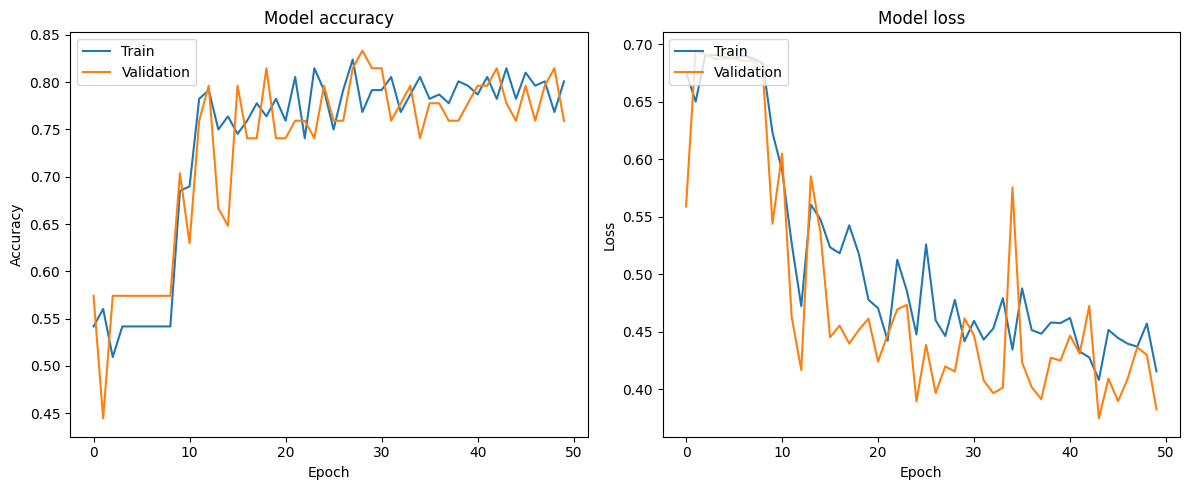

In [52]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8371 - loss: 0.4933
Accuracy: 0.8382353186607361


# Testing

Saving retak.jpg to retak (1).jpg


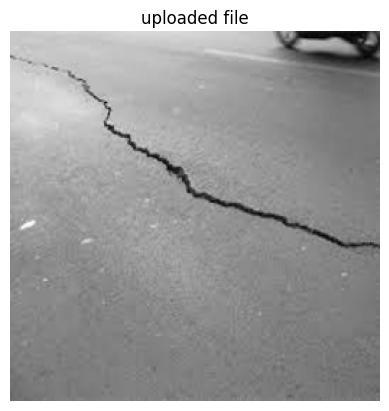

In [53]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image
from skimage.color import rgb2gray
from skimage import util
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

#cv rgb ke bgr
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# preprocess
im_frame = Image.fromarray(img_rgb).resize((64*4, 64*4))
image = (255 * rgb2gray(np.array(im_frame))).astype(np.uint8)
imaged = util.img_as_ubyte(image)
plt.imshow(imaged, cmap='gray')
plt.title('uploaded file')
plt.axis('off')
plt.show()

In [54]:
sample = glcm_process(filename,path='/content/')
sample = np.array(sample).reshape(1,5)
# sample
sample

array([[1.37928125e+03, 2.97916667e+01, 2.08235748e-02, 1.63107526e-02,
        1.82375939e-01]])

In [56]:
import numpy as np

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Prediksi crack:", pred[0][0])

if pred[0][0] < 0.5:
  print("tidak retak")
else:
  print("retak nih 😂")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

X does not have valid feature names, but StandardScaler was fitted with feature names


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Prediksi crack: 1.0
retak nih 😂
